In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size = 100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10, size = 100)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

<Figure size 640x480 with 1 Axes>

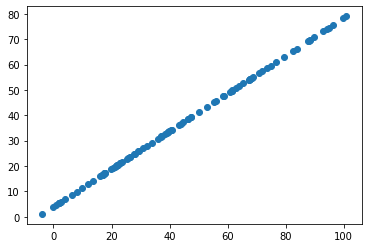

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

plt.scatter(X_restore[:, 0], X_restore[:, 1])
plt.show()

#### 手写数据mnist

In [3]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [4]:
noisy_digits = X + np.random.normal(0, 4, size = X.shape) #X数据加入噪音

In [5]:
example_digits = noisy_digits[y == 0,:][:10]
for num in range(1, 10):
    X_num = noisy_digits[y == num,:][:10]
    example_digits = np.vstack([example_digits, X_num])
example_digits.shape #100个数据

(100, 64)

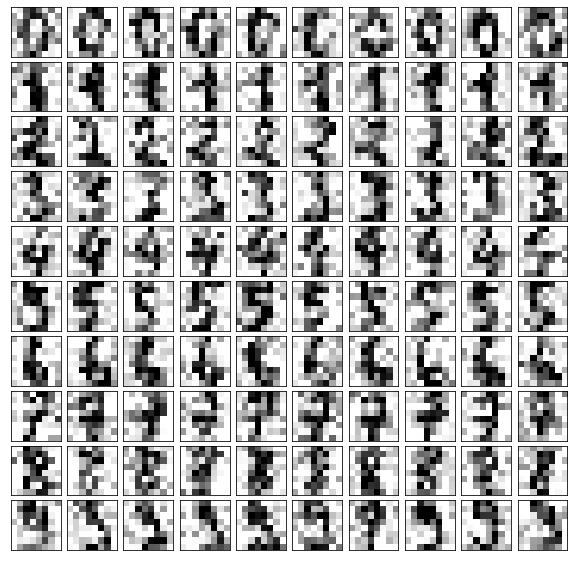

In [6]:
def plot_digits(data): #一幅图中绘制子图
    fig, axes = plt.subplots(10, 10, figsize=(10, 10), 
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                 cmap='binary',interpolation='nearest',
                 clim=(0, 16))
    plt.show()
plot_digits(example_digits) #可以看到最终的图片具有很多的噪声

In [7]:
pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
pca.n_components_

12

In [9]:
components = pca.transform(example_digits) #高维到低维
filtered_digits = pca.inverse_transform(components) #低维返回到高维

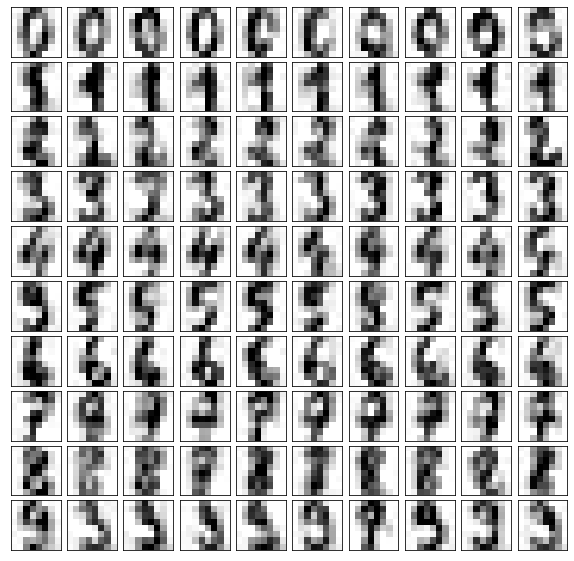

In [10]:
plot_digits(filtered_digits) #相比之前，降噪明显